In [1]:
# necessary libraries

import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# to load csv file

ab_test_raw = pd.read_csv(os.path.abspath('data/data_ab.csv'))
ab_test = ab_test_raw.copy()
ab_test.sample(5)

# GRP A: control group
# GRP B: treatment group

,idUser,dtPurchased,nmGroup,isConv
4764,12113014,2017-04-06,GRP B,1
631,39043693,2017-02-18,GRP A,1
292,83993853,2017-03-02,GRP A,1
996,57863417,2017-08-22,GRP A,0
2366,65823695,2017-01-20,GRP A,0


In [3]:
ab_test.info()

# no missing values, but a variable Dtype have to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idUser       6177 non-null   int64 
 1   dtPurchased  6177 non-null   object
 2   nmGroup      6177 non-null   object
 3   isConv       6177 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 193.2+ KB


In [4]:
ab_test['dtPurchased'] = pd.to_datetime(ab_test['dtPurchased'])

In [5]:
# no duplicated idUser

ab_test.idUser.nunique()

6177

In [9]:
# time taken to collect the observations 

ab_test.groupby('nmGroup', as_index=False)['dtPurchased'].agg(['min', 'max'])

# 1 year seems like too long for a business
# maybe the experiment could have been design better

,nmGroup,min,max
0,GRP A,2017-01-01,2017-12-31
1,GRP B,2017-01-01,2017-12-31


In [10]:
# to show some statistics about conversions: how traffic has been diverted (count), how many conversions and conversion rate per group

stat_df = ab_test.groupby('nmGroup', as_index=False)['isConv'].agg(['count', 'sum', 'mean']).rename(columns={'sum': 'totConv', 'mean': 'convRate'})
stat_df

# the amount of observations is not equally divided by the two groups

,nmGroup,count,totConv,convRate
0,GRP A,3029,811,0.267745
1,GRP B,3148,915,0.290661


In [11]:
# baseline conversion rate: 26.77 %
# about 3000 observations per group
# minimum detectable effect: about 3.2 %

In [12]:
# Observed Test Statistic: treatment conversion rate - control conversion rate

mu_diff = stat_df['convRate'].iloc[1] - stat_df['convRate'].iloc[0]
print('Observed Test Statistic:', round(mu_diff, 6))

Observed Test Statistic: 0.022916


In [13]:
# permutation test

n = 1000
mu_diff_samples = []

for i in range(n):
    ab_test_sample1 = ab_test.sample(frac=0.5, replace=False)
    ix2 = set(ab_test.index) - set(ab_test_sample1.index)
    ab_test_sample2 = ab_test.iloc[list(ix2)]
    mu_diff_tmp = ab_test_sample1['isConv'].mean() - ab_test_sample2['isConv'].mean()
    mu_diff_samples.append(mu_diff_tmp)

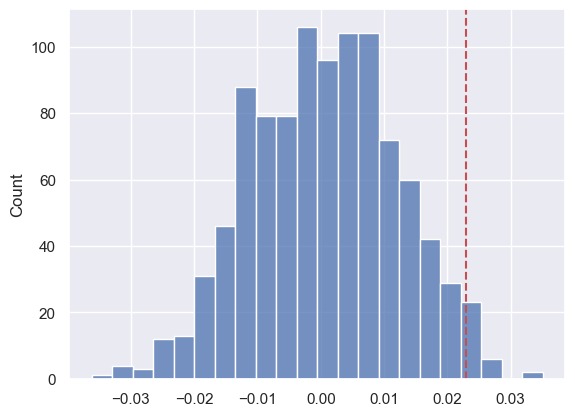

Average Simulated Test Statistic: 0.000519
Observed Test Statistic: 0.022916


In [14]:
# to plot the distribution of the differences between sample means and highlight the Observed Test Statistic

sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, ymin=0, ymax=1, linestyle='--', color='r')
plt.show()

print('Average Simulated Test Statistic:', round(np.mean(mu_diff_samples), 6))
print('Observed Test Statistic:', round(np.mean(mu_diff), 6))

In [17]:
# significance level of 5 %

alpha = 0.05

# p-value

p_value = np.mean([el > mu_diff for el in mu_diff_samples])

print('alpha:', alpha)
print('p-value:', p_value)

alpha: 0.05
p-value: 0.026


In [19]:
# conclusions

if p_value <= alpha:
    print('Null hypothesis (H0) rejected: the observed result is statistically significant')
else:
    print('Null hypothesis (H0) accepted: the observed result is NOT statistically significant')

Null hypothesis (H0) rejected: the observed result is statistically significant
